## **Loan-Approval-Machine-Learning-Classification**

#### `Name & Surname: Abdulkadir Arslan`

# 1. The Story:

I work as a freelancer data scientist and a company called LendingClub.com wanted to get help from me for their user classification task. 

The company works as a platform that enables users to lend or borrow money from there. However, when they allow people to borrowing money, they need to take into consideration some risks. In this regard, they record the user features and they want to detect people who have trustful record and who have a high risk record.

My ultimate goal due to this process will be conducting a Machine Learning experiment and classifying users in terms of their credibility by looking at their other features and decreasing the risk of giving loans to people who are less likely to pay it back.

The value that is going to be created is making the LendingClub.com more reputable and trustful platform by leveraging the power of machine learning. 

### The Packages:

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    ConfusionMatrixDisplay, 
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    classification_report, 
    roc_auc_score, 
    make_scorer, 
    confusion_matrix
)

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

from sklearn.inspection import permutation_importance


# 2. The Data

The data comes from an online platform that was built to help people to lend and borrow money, which is called LendingClub.com, Lending Club connects people who need money (borrowers) with people who have money (investors). The data represents the lending information about whether the borrower paid back in full or not. In this regard, the user data was recorded in different aspects:

### 2.1 The Features

`credit.policy`: '1' if the borrower meets the credit underwriting criteria of LendingClub.com, and '0' otherwise.

`purpose:` This feature indicates the purpose of the loan ("credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

`int.rate:` This feature shows the interest rate of the loan and it is represented between 0 and 1. 

`installment:` This feature represents how many montly installments are going to be provided to the borrower. 

`log.annual.inc:` This feature shows the logarithmic value(ln(x)) of the annual income($) of the borrower.  

`dti:` This feature shows the ratio of the debt amount of the borrower to the annual income of the borrower.

`fico:` This feature shows the FICO credit score of the borrower.

- FICO credit score: The FICO® Score is used by lenders to help make accurate, reliable, and fast credit risk decisions across the customer lifecycle. The credit score rank-orders consumers by how likely they are to pay their credit obligations as agreed. Source and more information: https://www.fico.com/en/products/fico-score

`days.with.cr.line:` This feature shows the number of the days since the borrower's credit account was opened.

`revol.bal:` This feature shows the amount of unpaid at the end of the credit card billing cycle.

`revol.util:` This feature shows the percentage of the borrower's credit amount used compared to the borrower's total available credit.

`inq.last.6mths:` This feature shows the borrower's number of inquiries made by creditors in the last 6 months.

`delinq.2yrs:` This feature shows frequency with which the borrower has been late by 30 days or more on a payment within the last two years.

`pub.rec:` This feature shows the total count of negative public records associated with the borrower, including bankruptcy filings, tax liens, or judgments.

`not.fully.paid:` This feature represents if the borrower paid it's credit fully or not ('1' is not paid fully and '0' is paid fully)

2.2 The Data Suitability:

Since the company wanted me to classify the customers according to their borrowing or lending money aspect, the dataset provides related information in many features. The data suitability will be assessed in terms of suitability for a ML project in the coming steps also.

2.3 The Reference for the Dataset: `https://www.kaggle.com/datasets/saramah/loan-data/code`

###### I also provided the data file itself because the website asks for signing-in unless you do not have an account.

2.4 The license: The dataset was published under the license of `Open Data Commons Open Database License (ODbL) v1.0` on www.kaggle.com.

2.5 The Dataset

In [2]:
df_loan = pd.read_csv('loan_data.csv')
df_loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# 3. IDA

In this step:

- Number of the rows and the columns of the dataset

- Summary of the dataset via .info()

- Number of missing values

- Number of duplicated values

- The descriptive statistics for the numerical columns

will be shown.

In [3]:
print('Number of the rows and the columns of the dataset:')
print(df_loan.shape)

print('\nA summary of the dataset:\n')
print(df_loan.info())

print('\nThe number of the missing values (NaNs) in each column of the dataset:\n')
display(df_loan.isnull().sum())

print('\nThe count of duplicated rows in the DataFrame:\n')
display(df_loan.duplicated().sum())

features = df_loan.columns[1:-1]

print('\nThe descriptive statistics for the numerical columns of the DataFrame:\n')
display(df_loan[features].describe())

Number of the rows and the columns of the dataset:
(9578, 14)

A summary of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), objec

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


The count of duplicated rows in the DataFrame:



0


The descriptive statistics for the numerical columns of the DataFrame:



,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [4]:
categorical_cols = df_loan.select_dtypes(include=['object']).columns
print(f'One of the categorical features of the dataset is --> {categorical_cols}')
print("\nNumber of unique values in 'purpose' column:")
for col in categorical_cols:
    print(col, ": ", df_loan[col].nunique())

print("\nThe distribution of unique values in 'purpose' column:")
print(df_loan['purpose'].value_counts())

One of the categorical features of the dataset is --> Index(['purpose'], dtype='object')

Number of unique values in 'purpose' column:
purpose :  7

The distribution of unique values in 'purpose' column:
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


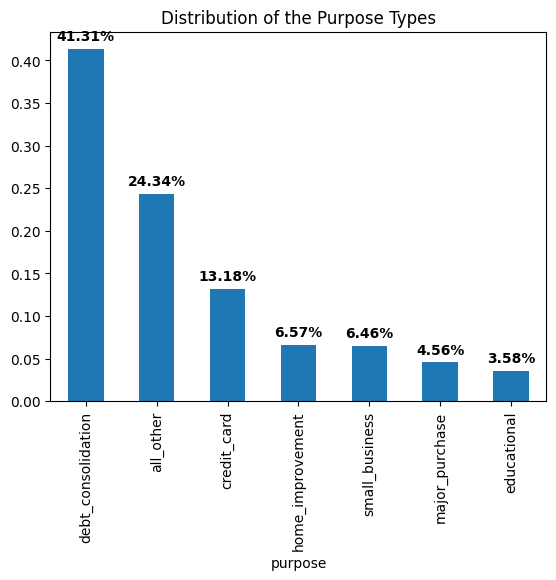

In [5]:
purpose_type = df_loan['purpose'].value_counts(normalize=True).plot(kind='bar', title='Distribution of the Purpose Types')

for i, count in enumerate(purpose_type.patches): 
     plt.text(count.get_x() + count.get_width() / 2, count.get_height() + 0.01,
              f"{round(count.get_height() * 100, 2)}%", ha='center', color='black', fontweight='bold')

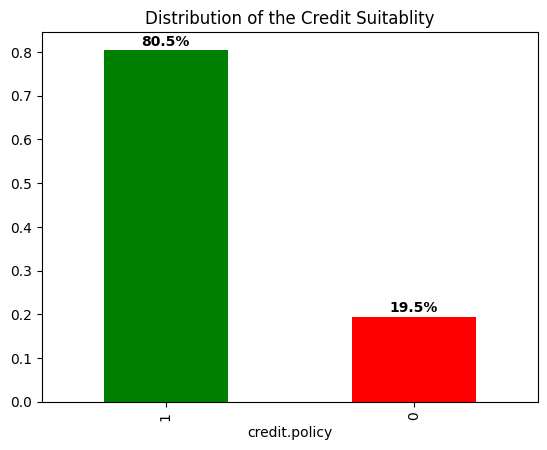

In [6]:
credit_suitablity = df_loan['credit.policy'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'],
                                                title='Distribution of the Credit Suitablity') 
for i, count in enumerate(credit_suitablity.patches): 
     plt.text(count.get_x() + count.get_width() / 2, count.get_height() + 0.01,
              f"{round(count.get_height() * 100, 2)}%", ha='center', color='black', fontweight='bold')

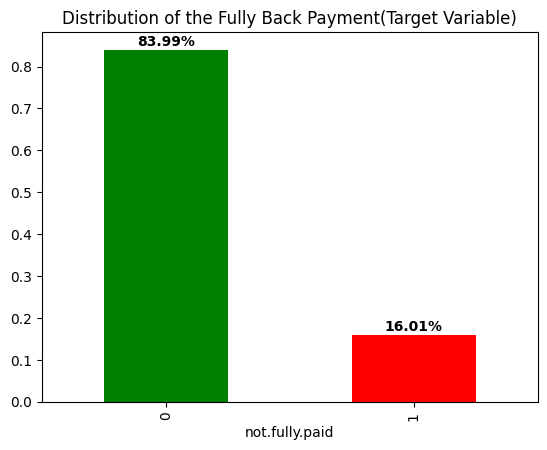

In [7]:
full_back_paid = df_loan['not.fully.paid'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'],
                                                title='Distribution of the Fully Back Payment(Target Variable)') 

for i, count in enumerate(full_back_paid.patches): 
     plt.text(count.get_x() + count.get_width() / 2, count.get_height() + 0.01,
              f"{round(count.get_height() * 100, 2)}%", ha='center', color='black', fontweight='bold')

Comments for the initial data analysis:
- The number of rows and columns, concise summary of the dataset are presented to got an overview about the dataset.
- There is not any missing values in any feature and there is not a duplication in the dataset.
- Statistical features such as mean, standard deviation, minimum and maximum for each feature were then calculated and displayed.
- Finally, the distribution of purpose types, credit suitablity, and fully back payment (0/1) are displayed in a bar chart to visualize the relationship between the the classes fo different features('purpose', 'credit.policy', 'not.fully.paid') in the dataset. Class distribution analysis helps us see how different groups are spread out in categories. It helps us understand if there's a good balance or if some groups are way more common than others.
  - If `not_fully_paid` is '0', it means that the borrower paid back in full.

# 4. EDA, Preprocessing

In the following code cell, I converted 'credit.policy' and 'not.fully.paid' columns from int to boolean type, to make data analysis and modeling processes easier by facilitating the interpretation and manipulation of binary categorical variables.

In [8]:
df_bool = df_loan.copy() 

df_bool['credit.policy'] = df_bool['credit.policy'].astype(bool)
df_bool['not.fully.paid'] = df_bool['not.fully.paid'].astype(bool)
df_bool.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,True,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,True,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,True,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,True,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,True,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False


In the following code cell, I sorted the distinct(unique) values for the features 'inq.last.6mths', 'delinq.2yrs', and 'pub.rec' in the dataset. This act of sorting helps prepare the data and provides understanding of the scope and distribution of values within categorical variables.

In [9]:
inq_df = pd.DataFrame(columns=['Value', 'Count', 'Percentage(%)'])
delinq_df = pd.DataFrame(columns=['Value', 'Count', 'Percentage(%)'])
pub_rec_df = pd.DataFrame(columns=['Value', 'Count', 'Percentage(%)'])

def compute_counts_and_percentages(df_bool, column_name, output_df):
    counts = df_bool[column_name].value_counts(normalize=False).sort_index()
    total_records = len(df_bool)
    for value, count in counts.items():
        percentage = (count / total_records) * 100
        output_df.loc[len(output_df)] = [value, count, percentage]

compute_counts_and_percentages(df_bool, 'inq.last.6mths', inq_df)
compute_counts_and_percentages(df_bool, 'delinq.2yrs', delinq_df)
compute_counts_and_percentages(df_bool, 'pub.rec', pub_rec_df)

print("Sorting unique values for categorizable numerical features, these unique values' counts in the features, and their percentage shares in the total count:")
side_by_side = pd.concat([inq_df, delinq_df, pub_rec_df], axis=1, keys=['inq.last.6mths', 'delinq.2yrs', 'pub.rec'])
side_by_side

Sorting unique values for categorizable numerical features, these unique values' counts in the features, and their percentage shares in the total count:


inq.last.6mths                       delinq.2yrs                        \
            Value   Count Percentage(%)       Value   Count Percentage(%)   
0             0.0  3637.0     37.972437         0.0  8458.0     88.306536   
1             1.0  2462.0     25.704740         1.0   832.0      8.686573   
2             2.0  1384.0     14.449781         2.0   192.0      2.004594   
3             3.0   864.0      9.020672         3.0    65.0      0.678639   
4             4.0   475.0      4.959282         4.0    19.0      0.198371   
5             5.0   278.0      2.902485         5.0     6.0      0.062644   
6             6.0   165.0      1.722698         6.0     2.0      0.020881   
7             7.0   100.0      1.044059         7.0     1.0      0.010441   
8             8.0    72.0      0.751723         8.0     1.0      0.010441   
9             9.0    47.0      0.490708        11.0     1.0      0.010441   
10           10.0    23.0      0.240134        13.0     1.0      0.010441   
11           11.0    15.0      0.156609         NaN     NaN           NaN   
12           12.0    15.0      0.156609         NaN     NaN           NaN   
13           13.0     6.0      0.062644         NaN     NaN           NaN   
14           14.0     6.0      0.062644         NaN     NaN           NaN   
15           15.0     9.0      0.093965         NaN     NaN           NaN   
16           16.0     3.0      0.031322         NaN     NaN           NaN   
17           17.0     2.0      0.020881         NaN     NaN           NaN   
18           18.0     4.0      0.041762         NaN     NaN           NaN   
19           19.0     2.0      0.020881         NaN     NaN           NaN   
20           20.0     1.0      0.010441         NaN     NaN           NaN   
21           24.0     2.0      0.020881         NaN     NaN           NaN   
22           25.0     1.0      0.010441         NaN     NaN           NaN   
23           27.0     1.0      0.010441         NaN     NaN           NaN   
24           28.0     1.0      0.010441         NaN     NaN           NaN   
25           31.0     1.0      0.010441         NaN     NaN           NaN   
26           32.0     1.0      0.010441         NaN     NaN           NaN   
27           33.0     1.0      0.010441         NaN     NaN           NaN   

   pub.rec                        
     Value   Count Percentage(%)  
0      0.0  9019.0     94.163708  
1      1.0   533.0      5.564836  
2      2.0    19.0      0.198371  
3      3.0     5.0      0.052203  
4      4.0     1.0      0.010441  
5      5.0     1.0      0.010441  
6      NaN     NaN           NaN  
7      NaN     NaN           NaN  
8      NaN     NaN           NaN  
9      NaN     NaN           NaN  
10     NaN     NaN           NaN  
11     NaN     NaN           NaN  
12     NaN     NaN           NaN  
13     NaN     NaN           NaN  
14     NaN     NaN           NaN  
15     NaN     NaN           NaN  
16     NaN     NaN           NaN  
17     NaN     NaN           NaN  
18     NaN     NaN           NaN  
19     NaN     NaN           NaN  
20     NaN     NaN           NaN  
21     NaN     NaN           NaN  
22     NaN     NaN           NaN  
23     NaN     NaN           NaN  
24     NaN     NaN           NaN  
25     NaN     NaN           NaN  
26     NaN     NaN           NaN  
27     NaN     NaN           NaN

In the following code cell, I decided to perform the custom binning method after I explored the distribution of values within categorical features ('inq.last.6mths', 'delinq.2yrs', 'pub.rec') just in the previous step, I made my own way of grouping data for certain features in the dataset. Custom binning means putting continuous or discrete numbers into set groups or ranges based on specific rules or limits.

Custom binning helps us to understand the data better by finding important patterns or connections in the numbers, which can make our models work better.

Grouping data into bins makes it simpler to explain compared to having lots of individual numbers. It's like putting things into boxes instead of having them scattered around.

Binning can make our models work better by getting rid of some extra randomness, dealing with unusual numbers, and finding tricky connections between things.

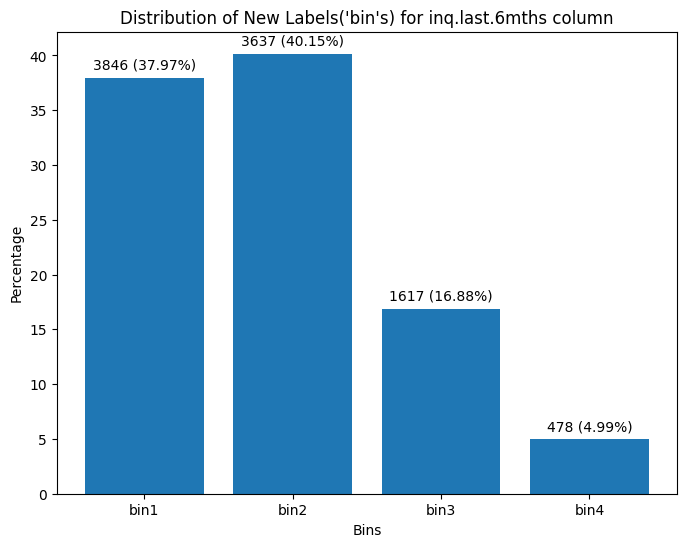

<Figure size 300x300 with 0 Axes>

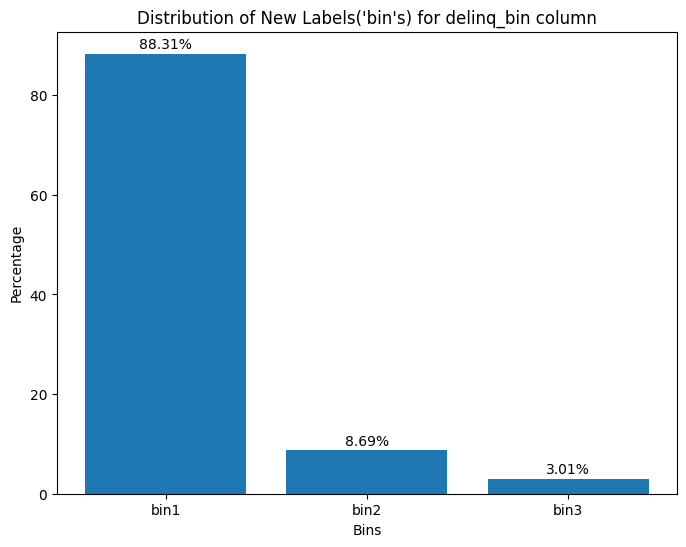

<Figure size 300x300 with 0 Axes>

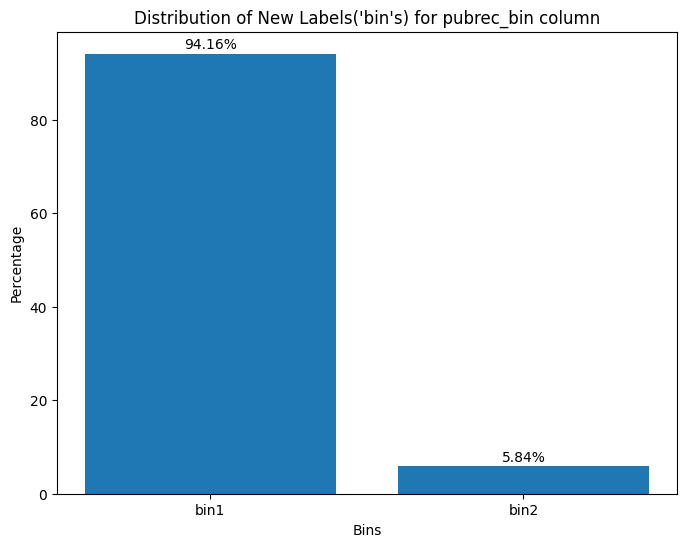

<Figure size 300x300 with 0 Axes>

In [10]:
def bin_values(val):
    if val == 0:
        return 'bin1'
    elif val in [1, 2]:
        return 'bin2'
    elif val in [3, 4, 5]:
        return 'bin3'
    else:
        return 'bin4'

df_bool['inq_bin'] = df_bool['inq.last.6mths'].apply(bin_values)

bin_distribution = df_bool['inq_bin'].value_counts(normalize=True) * 100

sorted_distribution = bin_distribution.sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_distribution.index, sorted_distribution.values)

for bar, count, percentage in zip(bars, df_bool['inq_bin'].value_counts(), sorted_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{count} ({percentage:.2f}%)",
             ha='center', va='bottom', fontsize=10)

plt.title("Distribution of New Labels('bin's) for inq.last.6mths column")
plt.xlabel('Bins')
plt.ylabel('Percentage')

plt.figure(figsize=(3, 3))
plt.tight_layout()
plt.show();

def bin_delinq(value):
    if value == 0:
        return 'bin1'
    elif value == 1:
        return 'bin2'
    else:
        return 'bin3'

df_bool['delinq_bin'] = df_bool['delinq.2yrs'].apply(bin_delinq)

delinq_bin_distribution = df_bool['delinq_bin'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(delinq_bin_distribution.index, delinq_bin_distribution.values)

for bar, percentage in zip(bars, delinq_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

plt.title("Distribution of New Labels('bin's) for delinq_bin column")
plt.xlabel('Bins')
plt.ylabel('Percentage')

plt.figure(figsize=(3, 3))
plt.tight_layout()
plt.show()

def bin_pub_rec(val):
    return 'bin1' if val == 0 else 'bin2'

df_bool['pubrec_bin'] = df_bool['pub.rec'].apply(bin_pub_rec)

pubrec_distribution = df_bool['pubrec_bin'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(pubrec_distribution.index, pubrec_distribution.values)

for bar, percentage in zip(bars, pubrec_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

plt.title("Distribution of New Labels('bin's) for pubrec_bin column")
plt.xlabel('Bins')
plt.ylabel('Percentage')

plt.figure(figsize=(3, 3))
plt.tight_layout()
plt.show()

In the following code cell, I filtered the records with values over 100% in the 'revol.util' column of the dataset and updated these values to 100%. The values over 100% in this feature may indicate data errors or inconsistencies that require investigation.

In [11]:
df_revol_util_over_100 = df_bool.copy()

revol_util_over_100 = df_revol_util_over_100.index[df_revol_util_over_100['revol.util'] > 100]

df_revol_util_over_100.loc[revol_util_over_100, 'revol.util'] = 100

df_rev = df_revol_util_over_100.copy()

df_rev.loc[revol_util_over_100]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,inq_bin,delinq_bin,pubrec_bin
7777,False,credit_card,0.1438,42.96,9.210340,5.64,632,660.000000,1269,100.0,1,0,0,False,bin2,bin1,bin1
7895,False,debt_consolidation,0.1438,149.48,9.852194,13.45,642,1139.000000,2422,100.0,3,0,0,False,bin3,bin1,bin1
7914,False,debt_consolidation,0.1186,23.21,10.060491,11.33,657,2879.958333,4479,100.0,1,0,0,True,bin2,bin1,bin1
7922,False,credit_card,0.1438,359.95,11.245046,9.98,642,4679.958333,15918,100.0,6,0,0,True,bin4,bin1,bin1
7923,False,all_other,0.0933,287.59,9.615805,13.36,717,3268.958333,2588,100.0,0,0,0,True,bin1,bin1,bin1
7957,False,debt_consolidation,0.1786,88.41,10.915088,9.62,612,1230.000000,1190,100.0,15,0,0,False,bin4,bin1,bin1
7982,False,credit_card,0.1438,137.45,9.615805,16.32,647,1049.000000,4364,100.0,5,0,0,True,bin3,bin1,bin1
7991,False,all_other,0.0996,51.60,9.798127,10.33,682,2910.000000,6646,100.0,1,0,0,True,bin2,bin1,bin1
8056,False,all_other,0.1059,78.11,10.032408,5.70,672,3150.041667,3613,100.0,1,1,0,False,bin2,bin2,bin1
8073,False,educational,0.1375,495.52,11.338572,19.10,662,6660.041667,26710,100.0,3,0,0,False,bin3,bin1,bin1


In the following code cell, I created histograms for all numerical features in the dataset to graphically represent the distribution of these features. Making histograms for the numerical features in the dataset helps us see how the data is spread out. This helps us understand the data better and find patterns that can be useful for further analysis and modeling.


The histograms for each numerical column in the DataFrame:



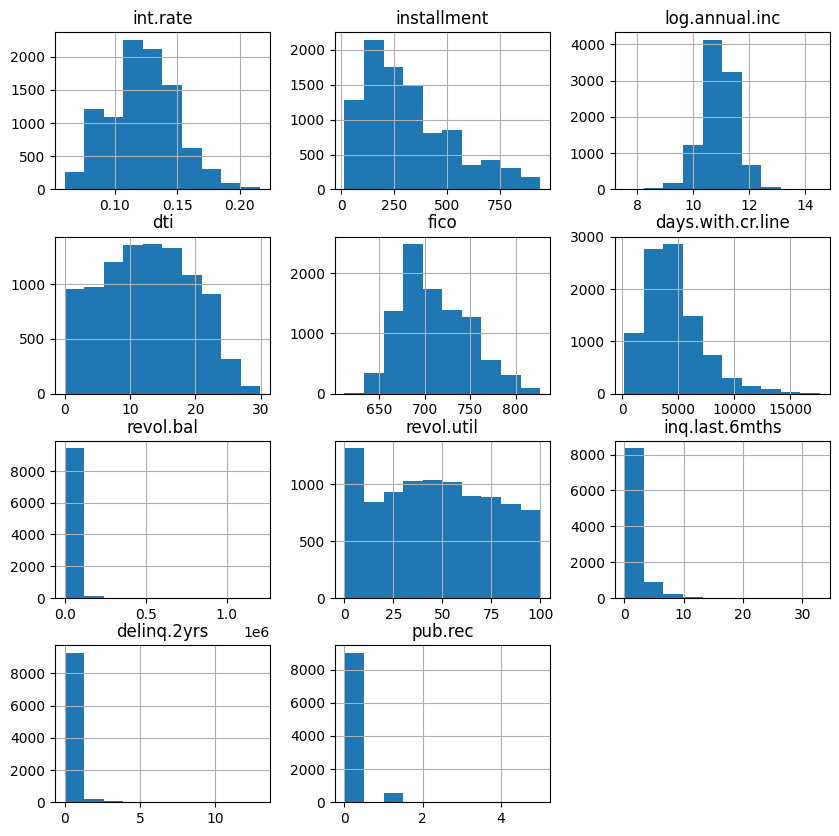

In [12]:
numerical_features = df_rev.select_dtypes(include=['int64', 'float64'])

print('\nThe histograms for each numerical column in the DataFrame:\n')
numerical_features.hist(figsize=(10,10))
plt.show()

In the following code cell, I implemented a logarithm transformation on the 'revol.bal' feature within the dataset. Logarithm transformation is a frequently employed method aimed at mitigating the asymmetry of data distributions, thereby fostering symmetry. This adjustment can enhance the efficacy of various machine learning algorithms and statistical analyses. After logarithm transformation, the distribution of the values is more observable and visible on the plot below when compared to the one displayed in just previous histograms.

The source for logarithmic transformation in data analysis: https://juandelacalle.medium.com/best-tips-and-tricks-when-and-why-to-use-logarithmic-transformations-in-statistical-analysis-9f1d72e83cfc

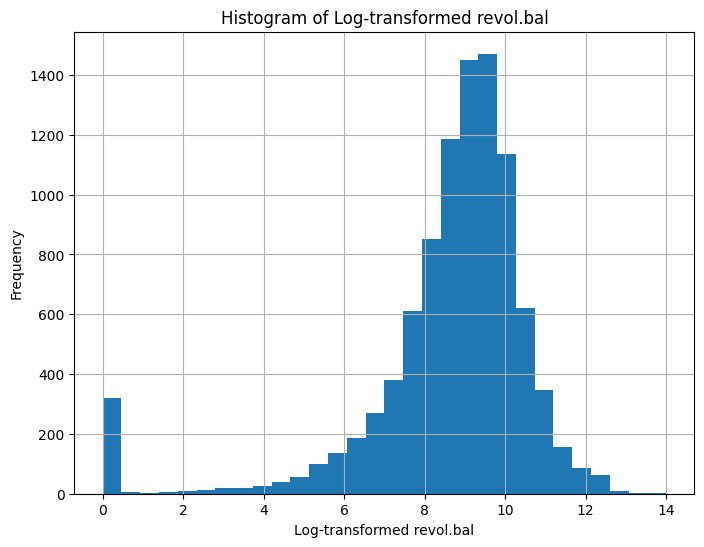

In [13]:
df_rev['revol.bal_log'] = np.log1p(df_rev['revol.bal'])

plt.figure(figsize=(8, 6))
df_rev['revol.bal_log'].hist(bins=30)
plt.title('Histogram of Log-transformed revol.bal')
plt.xlabel('Log-transformed revol.bal')
plt.ylabel('Frequency')
plt.show()

In the following code cell, I constructed a correlation matrix to explore the connections among numerical features in the dataset. This matrix offers valuable insights into the magnitude and direction of linear associations between variables, aiding in the identification of possible patterns and interdependencies.

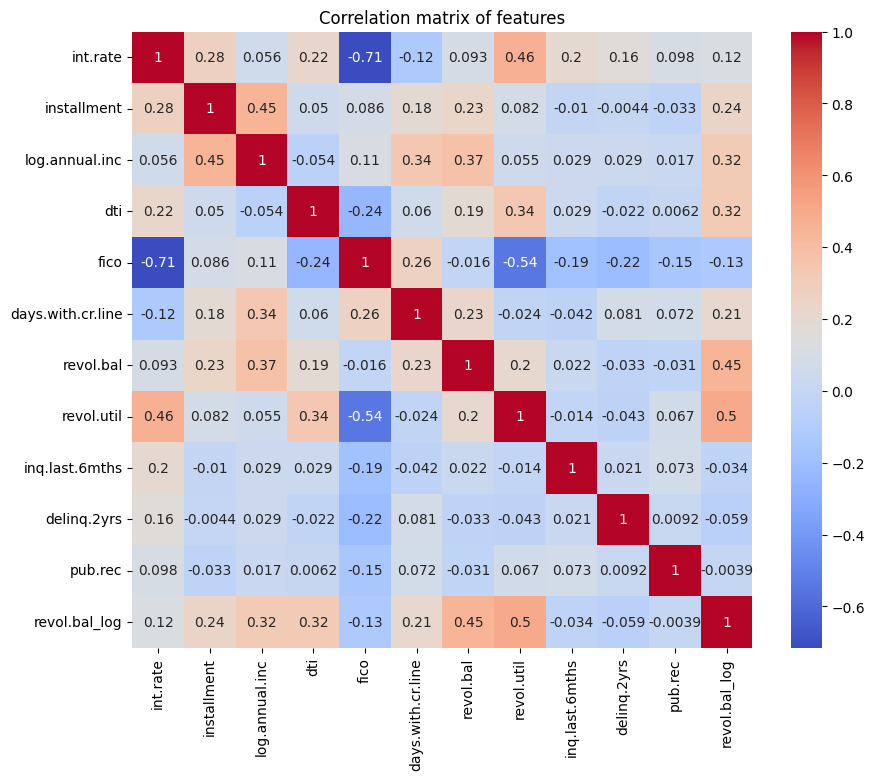

In [14]:
num_features = df_rev.select_dtypes(include=['int64', 'float64'])
corr_mat= num_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of features')
plt.show()

In the following code cell, I implemented one-hot encoding on the 'purpose' column within the dataset, I dropped the 'purpose' column after encoding it. One-hot encoding is a prevalent method utilized to convert categorical variables into a binary format. Each category is represented by a binary vector, where a solitary '1' denotes the presence of the category, while the remaining positions hold '0's.

One-hot encoding produces numerical features that align with various machine learning algorithms, streamlining model training and assessment processes.

***Note:*** My one-hot encoded columns are being displayed as boolean values instead of numerical values (0 or 1). It's likely due to how pandas is displaying the DataFrame, rather than how the encoding itself is performed. Pandas may display binary-encoded columns as boolean by default for readability and clarity. Whether the data is displayed as boolean or numerical values doesn't affect its usability in machine learning models, as long as the underlying values are correctly encoded.

In [15]:
ohe = pd.get_dummies(df_rev['purpose'], prefix='purpose')

df_ohe = pd.concat([df_rev, ohe], axis=1)

df_ohe.drop('purpose', axis=1, inplace=True)

df_ohe.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,delinq_bin,pubrec_bin,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,True,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,bin1,bin1,10.270039,False,False,True,False,False,False,False
1,True,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,bin1,bin1,10.422995,False,True,False,False,False,False,False
2,True,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,bin1,bin1,8.163941,False,False,True,False,False,False,False
3,True,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,bin1,bin1,10.424303,False,False,True,False,False,False,False
4,True,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,bin2,bin1,8.464003,False,True,False,False,False,False,False


In the following code cell, I dropped the features from the DataFrame that were transformed or engineered into new features.

In [16]:
display(df_ohe.columns)

df_drop = df_ohe.copy()

drop_features = ['revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
df_drop.drop(drop_features, axis=1, inplace=True)

df_drop.head()

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'inq_bin',
       'delinq_bin', 'pubrec_bin', 'revol.bal_log', 'purpose_all_other',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,not.fully.paid,inq_bin,delinq_bin,pubrec_bin,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,True,0.1189,829.10,11.350407,19.48,737,5639.958333,52.1,False,bin1,bin1,bin1,10.270039,False,False,True,False,False,False,False
1,True,0.1071,228.22,11.082143,14.29,707,2760.000000,76.7,False,bin1,bin1,bin1,10.422995,False,True,False,False,False,False,False
2,True,0.1357,366.86,10.373491,11.63,682,4710.000000,25.6,False,bin2,bin1,bin1,8.163941,False,False,True,False,False,False,False
3,True,0.1008,162.34,11.350407,8.10,712,2699.958333,73.2,False,bin2,bin1,bin1,10.424303,False,False,True,False,False,False,False
4,True,0.1426,102.92,11.299732,14.97,667,4066.000000,39.5,False,bin1,bin2,bin1,8.464003,False,True,False,False,False,False,False


In the following code cell, I used label encoding to convert categorical 'bin' variables into numerical representations. Label encoding is a preprocessing method frequently applied to convert categorical variables into numerical format, a necessity for numerous machine learning algorithms.

Label encoding transforms categorical variables into numerical form, facilitating more effective processing by machine learning algorithms. It is suitable for categorical variables exhibiting a natural order or hierarchy, such as ordinal variables represented by bins. As many machine learning algorithms necessitate numerical input, label encoding becomes unavoidable as a preprocessing step for categorical features.

In [17]:
binned_cols = ['inq_bin', 'delinq_bin', 'pubrec_bin']

orj_names_binned_cols = ['inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin']

label_encoder = LabelEncoder()

df = df_drop.copy()

for feature, updated_feature_name in zip(binned_cols, orj_names_binned_cols):
    df[updated_feature_name] = label_encoder.fit_transform(df[feature])
    df.drop(feature, axis=1, inplace=True) 

df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,not.fully.paid,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin
0,True,0.1189,829.10,11.350407,19.48,737,5639.958333,52.1,False,10.270039,False,False,True,False,False,False,False,0,0,0
1,True,0.1071,228.22,11.082143,14.29,707,2760.000000,76.7,False,10.422995,False,True,False,False,False,False,False,0,0,0
2,True,0.1357,366.86,10.373491,11.63,682,4710.000000,25.6,False,8.163941,False,False,True,False,False,False,False,1,0,0
3,True,0.1008,162.34,11.350407,8.10,712,2699.958333,73.2,False,10.424303,False,False,True,False,False,False,False,1,0,0
4,True,0.1426,102.92,11.299732,14.97,667,4066.000000,39.5,False,8.464003,False,True,False,False,False,False,False,0,1,0


# 5. A First Impression

### 5.1 Creating train and test splits:

In the following code cell, I split the dataset into training and testing sets to facilitate model training and evaluation with 80% and 20% splits respectively.

In [18]:
# Splitted the data into features (X) and target variable (y)
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

# Splitted the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displayed the shape of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (7662, 19) (7662,)
Test set shape: (1916, 19) (1916,)


### 5.2 Scaling:

In the following code cell, I performed scaling on the numerical features within the dataset via `StandardScaler`. The scaling changes between 0 and 1 or -1 and 1. This scaling step was applied to ensure that all features hold comparable importance during model training, thus preventing features with larger values from overshadowing those with smaller ones.

I alredy splitted the data above to prevent information leakage and guarantee that scaling was independently applied to each subset.

In [19]:
# Selected numerical features for normalization
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Initialized StandardScaler
scaler = StandardScaler()

# Fitted the scaler to the training data and transform the numerical features
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transformed the numerical features in the test set using the scaler fitted on the training set
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Displayed the head of the normalized training and testing sets as styled tables
print("Normalized Training Set:")
display(X_train.head())
print("\nNormalized Testing Set:")
X_test.head()

Normalized Training Set:


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin
7317,True,0.868707,0.049122,-1.535031,-0.172101,-0.498260,0.268636,-0.608260,-1.633740,False,False,False,False,False,True,False,1,0,0
350,True,-1.431963,-0.391757,0.475451,-0.948919,0.811133,-0.566438,-0.208505,-0.099480,False,True,False,False,False,False,False,0,0,0
5206,True,-0.283480,-0.865503,0.385937,-0.837116,0.156437,-0.302347,0.883928,0.365895,False,False,True,False,False,False,False,1,0,0
2673,True,-1.083713,1.015832,0.203709,-0.616412,0.549255,-0.194484,1.335376,0.933546,True,False,False,False,False,False,False,0,0,0
3528,True,-0.364985,-0.024503,-0.393163,0.935774,1.203951,0.992200,-1.438785,-1.251671,False,False,False,False,False,True,False,1,0,0



Normalized Testing Set:


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,revol.bal_log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin
8558,False,1.187319,0.659518,-0.551198,0.279471,-1.414835,-0.302347,1.231991,0.213059,False,False,True,False,False,False,False,2,0,0
4629,True,-0.153813,1.046473,0.362771,-0.247604,0.549255,-0.386254,-0.191274,0.495554,False,False,True,False,False,False,False,2,0,0
1383,True,-0.290890,-0.578554,-0.956987,0.164763,-0.498260,-0.997593,1.356053,0.441664,False,True,False,False,False,False,False,0,0,0
8142,False,1.561502,-1.021902,0.111011,2.259996,-1.022017,0.764486,-0.711645,0.174401,True,False,False,False,False,False,False,2,1,0
1768,True,-0.013031,-0.761673,0.315524,-1.249483,-0.236381,0.189107,-1.352631,-1.101934,True,False,False,False,False,False,False,1,1,0


### 5.3 Creating the baseline

In the following code cell, I used Dummy Classifier as a classification algorithm to get a first impression on its performance because it is computationally efficient and suitable for quick prototyping and initial model evaluation. It is going to serve as a baseline model for comparison with more complex algorithms like Random Forest and XGBoost.

In [20]:
# Create a dummy classifier with random prediction
dummy_clf = DummyClassifier(strategy="uniform")

# Train the dummy classifier
dummy_clf.fit(X_train, y_train) 
y_pred = dummy_clf.predict(X_test) 

# Evaluate the prediction accuracy
F1_score = f1_score(y_test, y_pred) * 100
Precision = precision_score(y_test, y_pred) * 100
Recall = recall_score(y_test, y_pred)  * 100

# Create a table with the results
Results = {'Metric': ['F1_score', 'Precision', 'Recall'],  # Specify the metrics
    'Dummy Classifier': [F1_score, Precision, Recall]}  # Specify the values

Results = pd.DataFrame(Results) 
Results['Dummy Classifier'] = Results['Dummy Classifier'].apply(lambda x: '{:.2f}%'.format(x))  # Format the values
display(Results)


,Metric,Dummy Classifier
0,F1_score,25.48%
1,Precision,16.82%
2,Recall,52.46%


The F1 score of the classification algorithm is 25.48%, indicating the relational mean of precision and recall. This score assesses the model's balance between precision and recall, with higher values indicating better performance in both metrics.

Precision, which measures the proportion of true positive predictions out of all positive predictions. For this project, in the case of loan approvals, a low precision could lead to approving loans that won't be repaid, resulting in financial loss for the lender. With a precision of 16.82%, the model aims to minimize false positives, thus reducing the risk of approving loans that may default.

Recall, also known as sensitivity, quantifies the model's ability to identify all relevant instances, out of all actual positive instances. For the classification algorithm, the recall is 52.46%, indicating its effectiveness in capturing a significant portion of positive instances.

### 5.4 The first ML Algorithm: Random Forest

In [21]:
rf_classifier = RandomForestClassifier(random_state=42)

In [22]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
rf_predictions = rf_classifier.predict(X_test)

In [24]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.8402922755741128
Classification Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       0.46      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.65      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916



### 5.5 The second ML Algortihm: XGBoost Classifier

In [25]:
xgb_classifier = XGBClassifier(random_state=42)

In [26]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [27]:
xgb_predictions = xgb_classifier.predict(X_test)

In [28]:
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))



XGBoost Classifier:
Accuracy: 0.8298538622129437
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1611
        True       0.37      0.10      0.16       305

    accuracy                           0.83      1916
   macro avg       0.61      0.53      0.53      1916
weighted avg       0.77      0.83      0.79      1916



# 6. Nested Cross Validation:

### 6.1 Choosing a reasonable grid of hyperparameters for the first ML Algorithm: Random Forest

In [29]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid,
                              cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Random Forest parameters found: ", rf_grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\third\envs\environmentap\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
407 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\third\envs\environmentap\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\third\envs\environmentap\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\third\envs\environmentap\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\

Best Random Forest parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


### 6.2 Choosing a reasonable grid of hyperparameters for the second ML algorithm: XGBoost

In [31]:
# Define the parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the classifier
xgb_classifier = XGBClassifier(random_state=42)

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid,
                               cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
xgb_grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best XGBoost parameters found: ", xgb_grid_search.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best XGBoost parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


Evalutation with the grid search:

In [32]:
# Evaluate Random Forest with best parameters
best_rf = rf_grid_search.best_estimator_
rf_best_predictions = best_rf.predict(X_test)
print("\nRandom Forest Classifier with best parameters:")
print("Accuracy:", accuracy_score(y_test, rf_best_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_best_predictions))


Random Forest Classifier with best parameters:
Accuracy: 0.8408141962421712
Classification Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       0.50      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.67      0.51      0.48      1916
weighted avg       0.79      0.84      0.77      1916



In [33]:
# Evaluate XGBoost with best parameters
best_xgb = xgb_grid_search.best_estimator_
xgb_best_predictions = best_xgb.predict(X_test)
print("\nXGBoost Classifier with best parameters:")
print("Accuracy:", accuracy_score(y_test, xgb_best_predictions))
print("Classification Report:")
print(classification_report(y_test, xgb_best_predictions))


XGBoost Classifier with best parameters:
Accuracy: 0.8382045929018789
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.99      0.91      1611
        True       0.37      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.61      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916



### 6.3 Conducting nested cross validation

Defining the parameters

In [34]:
# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# XGBoost hyperparameters
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


Setting up nested cross validation

In [35]:
# Define inner and outer cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV objects
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid, cv=inner_cv, scoring='f1', n_jobs=-1)

xgb_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                               param_grid=xgb_param_grid, cv=inner_cv, scoring='f1', n_jobs=-1)


Performing nested cross validation

In [36]:
# Random Forest nested CV
rf_nested_scores = cross_val_score(rf_grid_search, X, y, cv=outer_cv, scoring='f1', n_jobs=-1)
print(f'Random Forest nested cross-validation F1 score: {np.mean(rf_nested_scores):.4f} ± {np.std(rf_nested_scores):.4f}')




Random Forest nested cross-validation F1 score: 0.0454 ± 0.0112


In [37]:
# XGBoost nested CV
xgb_nested_scores = cross_val_score(xgb_grid_search, X, y, cv=outer_cv, scoring='f1', n_jobs=-1)
print(f'XGBoost nested cross-validation F1 score: {np.mean(xgb_nested_scores):.4f} ± {np.std(xgb_nested_scores):.4f}')

XGBoost nested cross-validation F1 score: 0.1739 ± 0.0224


### Comparison of the models

In [42]:
dummy_f1_score = 0.25


rf_test_f1_score = 4.00  
xgb_test_f1_score = 4.00

rf_nested_mean = 4.54 
rf_nested_std = 1.12   
xgb_nested_mean = 17.39 
xgb_nested_std = 2.24   

# creating the df
comparision = {
    'Model': ['Dummy Classifier', 'Random Forest Classifier', 'XGBoost Classifier', 
              'Random Forest Nested CV', 'XGBoost Nested CV'],
    'F1 Score': [f'{dummy_f1_score:.2f}%', f'{rf_test_f1_score:.2f}%', f'{xgb_test_f1_score:.2f}%',
                 f'{rf_nested_mean:.2f}% ± {rf_nested_std:.2f}%', f'{xgb_nested_mean:.2f}% ± {xgb_nested_std:.2f}%'],
}

comparision_df = pd.DataFrame(comparision)
comparision_df


,Model,F1 Score
0,Dummy Classifier,0.25%
1,Random Forest Classifier,4.00%
2,XGBoost Classifier,4.00%
3,Random Forest Nested CV,4.54% ± 1.12%
4,XGBoost Nested CV,17.39% ± 2.24%


### Choosing the model

- The Dummy Classifier provides the baseline performance with random predictions. Its F1 score is extremely low, indicating that any real model should outperform it significantly.

- Random Forest Classifier shows an improvement over the dummy classifier but still has a low F1 score. This suggests the model has issues with class imbalance or is overfitting to the majority class (false)

-  XGBoost Classifier's performance similar to the Random Forest classifier. Indicates challenges in handling class imbalance. Despite hyperparameter tuning, it did not show a significant difference in the F1 score.

- Random Forest Nested CV shows a slight improvement over the Random Forest without nested CV. The small improvement suggests that nested CV provides some regularization benefit, but the overall score remains low.

- XGBoost Nested CV shows the highest F1 score with moderate variance. This indicates that it generalizes better and performs significantly better on average compared to other models, particularly in the context of handling class imbalance and predicting the minority class.


**The chosen model:  the XGBoost Classifier with Nested Cross-Validation**

# 7. Analysis of the Final Model

In [49]:
# Predict using the best XGBoost model
xgb_best_predictions = best_xgb.predict(X_test)

# Generate classification report
class_report = classification_report(y_test, xgb_best_predictions, target_names=['False', 'True'], output_dict=True)

# Print the classification report
print("XGBoost Classifier with best parameters:")
print(classification_report(y_test, xgb_best_predictions, target_names=['False', 'True']))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_best_predictions)




XGBoost Classifier with best parameters:
              precision    recall  f1-score   support

       False       0.84      0.99      0.91      1611
        True       0.37      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.61      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916



- True Negatives (1601): Correctly predicted samples of the False class.

- False Positives (10): False samples incorrectly predicted as True.

- False Negatives (299): True samples incorrectly predicted as False.

- True Positives (6): Correctly predicted samples of the True class

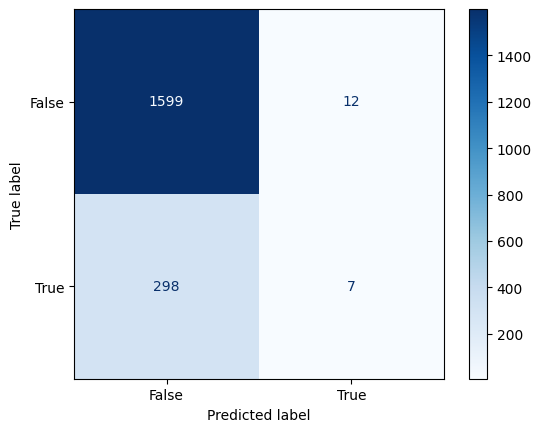

In [50]:
# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['False', 'True']).plot(cmap='Blues')

In [48]:
# Create a DataFrame for better visualization
report_df = pd.DataFrame(class_report).T

# Select relevant metrics and format
metrics_df = report_df[['precision', 'recall', 'f1-score', 'support']].copy()
metrics_df['precision'] = metrics_df['precision'].apply(lambda x: f'{x:.2f}')
metrics_df['recall'] = metrics_df['recall'].apply(lambda x: f'{x:.2f}')
metrics_df['f1-score'] = metrics_df['f1-score'].apply(lambda x: f'{x:.2f}')
metrics_df['support'] = metrics_df['support'].astype(int)

metrics_df


,precision,recall,f1-score,support
False,0.84,0.99,0.91,1611
True,0.37,0.02,0.04,305
accuracy,0.84,0.84,0.84,0
macro avg,0.61,0.51,0.48,1916
weighted avg,0.77,0.84,0.77,1916


This table and analysis highlight the need for targeted strategies to enhance the model’s ability to predict the minority class while maintaining overall accuracy.

### 8. Feature Importance

In [53]:
# Calculate permutation feature importance
perm_importance = permutation_importance(best_xgb, X_test, y_test, scoring='f1', n_repeats=30, random_state=42, n_jobs=-1)

# Get feature names 
feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else [f'feature_{i}' for i in range(X_test.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean, 'Std': perm_importance.importances_std})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Permutation Feature Importance:\n", importance_df)

Permutation Feature Importance:
                        Feature  Importance       Std
16          inq.last.6mths_bin    0.021063  0.005973
0                credit.policy    0.019286  0.004763
5                         fico    0.012909  0.010805
15      purpose_small_business    0.011384  0.006391
8                revol.bal_log    0.010744  0.007129
11  purpose_debt_consolidation    0.009542  0.005409
2                  installment    0.007362  0.013454
4                          dti    0.006547  0.005573
13    purpose_home_improvement    0.005114  0.002276
1                     int.rate    0.002743  0.007335
18                 pub.rec_bin    0.002391  0.004529
17             delinq.2yrs_bin    0.000803  0.003400
6            days.with.cr.line    0.000745  0.008525
10         purpose_credit_card    0.000576  0.003291
14      purpose_major_purchase   -0.000022  0.000061
7                   revol.util   -0.000426  0.006614
12         purpose_educational   -0.000584  0.001813
9            

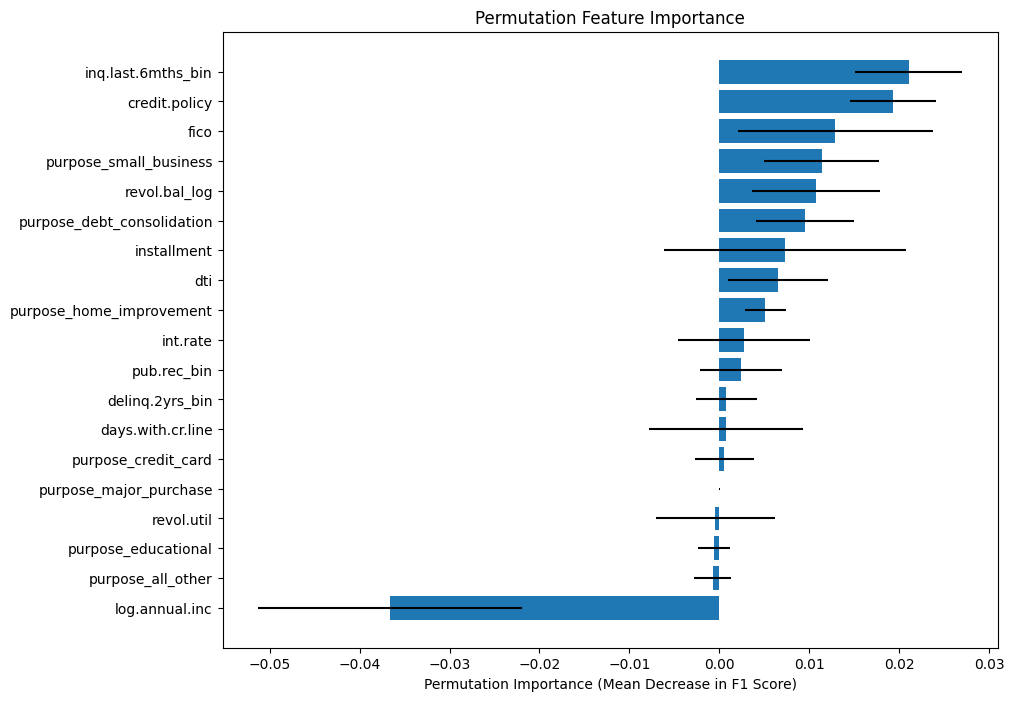

In [54]:
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Std'], align='center')
plt.xlabel('Permutation Importance (Mean Decrease in F1 Score)')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


- The permutation feature importance results for the XGBoost model indicate that inq.last.6mths_bin is the most critical feature, contributing an average decrease of 0.021 in the F1 score when permuted, with a standard deviation of 0.005. Following closely is credit.policy with an importance of 0.019 and a standard deviation of 0.004. Features like fico, purpose_small_business, and revol.bal_log also show moderate importance.

- However, features such as log.annual.inc have a negative impact on the model's performance when permuted, suggesting they might be less relevant or even detrimental. These results help identify which variables are most influential in the model's predictions, guiding further feature engineering and model refinement. The variability (Std) provides confidence in these importance scores, with lower values indicating more consistent importance across permutations. Overall, this analysis aids in understanding feature significance, focusing on the most impactful ones for better model performance.

### 9. Conclusions and Future Work

Summary:

- The analysis reveals that the XGBoost model with nested cross-validation provides the best performance, achieving a nested cross-validation F1 score of 17.39% ± 2.24%. The Random Forest model performs comparably but with a lower nested cross-validation F1 score of 4.54% ± 1.12%.

- For test performance, the XGBoost classifier yields an overall accuracy of 83.82%, with a significantly higher precision (0.37) for the minority class ("True") compared to the Random Forest. However, both models show low recall and F1-scores for the minority class, indicating poor retrieval of positive cases.

- Permutation feature importance identifies inq.last.6mths_bin and credit.policy as the most significant features in XGBoost predictions, suggesting their crucial roles. This comprehensive evaluation emphasizes XGBoost's superior performance, especially in handling class imbalance and feature significance.

The usability of the applied methodology and the created value:

The results may not meet with the expectation of the LendingClub.com, however it may show a baseline for their future work. The value that was created here can contribute to the efforts of making LendingClub.com website a more trustful platform with the help of detection of the risky borrowers.

Future work:

The following work can be done on the trying out the algorithms on the different hyperparameter grids and fine-tuning the selected XGBoost model. On top of that, as an alternative to the random forest classification, the decision tree algorithm can be used and some pruning algorithms can be applied to have better output.